In [1]:
pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Generate

In [3]:
from DataGenerate import *

word_pairs, word_pairs_annotations = GetWordPairs()
word_list = GetWords()

print("First 5 Word Pairs: ")
print(word_pairs[:5])

print("\nFirst 5 Words: ")
word_list[:5]

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
c:\Users\henry\Desktop\MastersProject\QC_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First 5 Word Pairs: 
[['party', 'government'], ['official', 'leader'], ['state', 'government'], ['control', 'intervention'], ['tax', 'interest']]

First 5 Words: 


['development', 'plan', 'action', 'training', 'education']

# BERT

In [4]:
from Models import BertEncodingWords

bert = BertEncodingWords()
def evaluateWordPair(bert, row_numbers):
	sents_to_evaluate = [bert.preprocessSentence(word_pairs[row_numbers[0]]), bert.preprocessSentence(word_pairs[row_numbers[1]])]
	hidden = bert.hiddenLayersBERT(sents_to_evaluate)
	embeddings = bert.GetEmbeddingsForBothWords(hidden)
	return 1 - cosine(embeddings[1][0], embeddings[1][1])

def evaluateAllSentPairs(bert, word_list):
		res = []
		for idx, word in enumerate(word_list):
			if idx % 2 == 0:
				res.append(1 - cosine(bert.getWordVector(word), bert.getWordVector(word_list[idx+1])))
		return res

def GetAllBERTVectors(bert, word_list):
	res = []
	for idx, word in enumerate(word_list):
		res.append(bert.getWordVector(word))
	return res

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Cosine Similarity')

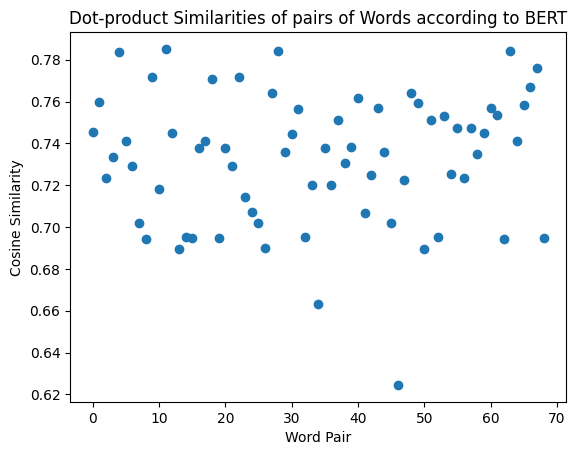

In [7]:
bertWwords = BertEncodingWords()
similarities = []
for pair in word_pairs:
	similarities.append(1-cosine(bertWwords.getWordVector(pair[0]), bertWwords.getWordVector(pair[1])))
similarities = evaluateAllSentPairs(bertWwords, word_list)
plt.scatter(np.arange(0,len(similarities)),similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")